In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#data = pd.read_json('../Extracted Data/Locations/face_locations_allmatch_8fps_+-10s.json')
data = pd.read_json('../Extracted Data/Locations/RETINAFACE_face_locations_allmatch_8fps_+-10.json')
data.head()

,face_locations,current_frame,action_frame,action_position,action_name,action_time,half
0,"[[518, 139, 193, 270]]",1101,1064,133295,Ball out of play,1 - 02:13,1
1,"[[719, 164, 209, 282]]",1104,1064,133295,Ball out of play,1 - 02:13,1
2,"[[745, 286, 165, 313]]",1112,1064,133295,Ball out of play,1 - 02:13,1
3,"[[812, 102, 176, 294]]",1114,1064,133295,Ball out of play,1 - 02:13,1
4,"[[805, 197, 175, 303]]",1116,1064,133295,Ball out of play,1 - 02:13,1


# Plots related to the number of faces by action

In [3]:
df1 = data.copy().reset_index(drop=True)
df1['frame_faces'] = df1['face_locations'].str.len()

    

In [4]:
# Number of faces by every action in the match
df1 = df1[['action_position','action_name','action_time','frame_faces']]
count1 = df1.groupby(['action_position','action_name','action_time'], as_index=False, sort=False).sum()
count1.loc[count1['action_name'] == 'Corner']


,action_position,action_name,action_time,frame_faces
3,182775,Corner,1 - 03:02,1706
23,667482,Corner,1 - 11:07,15
30,880053,Corner,1 - 14:40,61
34,971069,Corner,1 - 16:11,250
36,1031163,Corner,1 - 17:11,186
63,2021651,Corner,1 - 33:41,1219
83,2545244,Corner,1 - 42:25,100
98,326220,Corner,2 - 05:26,25
102,449261,Corner,2 - 07:29,643
124,1264588,Corner,2 - 21:04,28


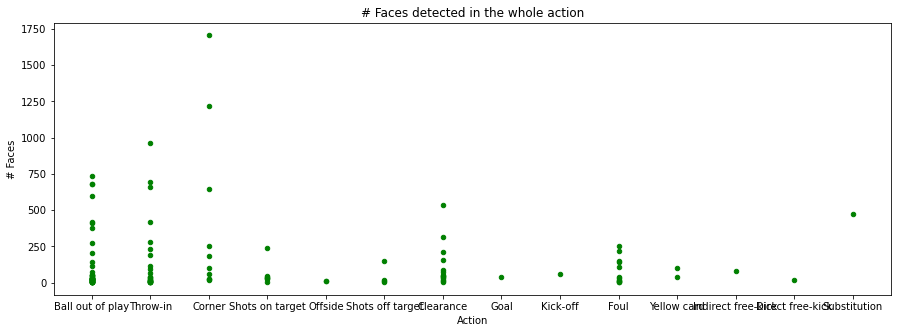

In [5]:
count1.plot(kind='scatter',x='action_name', y='frame_faces',color='green', figsize=(15,5), 
           title = '# Faces detected in the whole action', xlabel='Action', ylabel='# Faces')
plt.xlabel('Action')
plt.ylabel('# Faces')
plt.show()

In [6]:
# Number of faces by frame, of every action in the match
df2 = data.copy().reset_index(drop=True)
df2['frame_faces'] = df2['face_locations'].str.len()

count2 = df2[['action_name','action_time','action_position','current_frame','frame_faces']]
count2.loc[count2['action_name']=='Corner'].head()

,action_name,action_time,action_position,current_frame,frame_faces
136,Corner,1 - 03:02,182775,1422,55
137,Corner,1 - 03:02,182775,1423,56
138,Corner,1 - 03:02,182775,1424,60
139,Corner,1 - 03:02,182775,1425,58
140,Corner,1 - 03:02,182775,1426,58


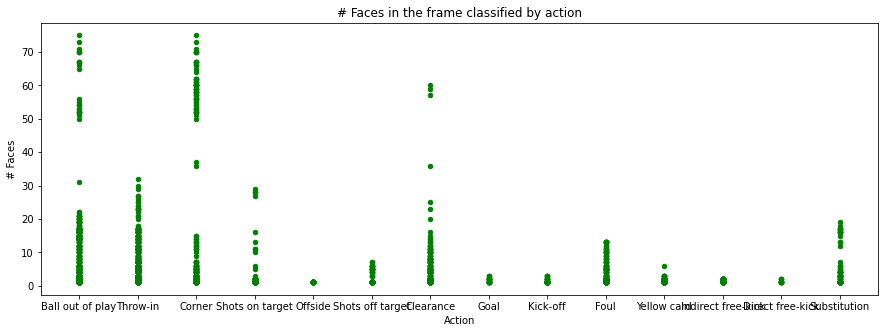

In [7]:
count2.plot(kind='scatter',x='action_name', y='frame_faces',color='green', figsize=(15,5), 
           title = '# Faces in the frame classified by action', xlabel='Action', ylabel='# Faces')
plt.xlabel('Action')
plt.ylabel('# Faces')
plt.show()

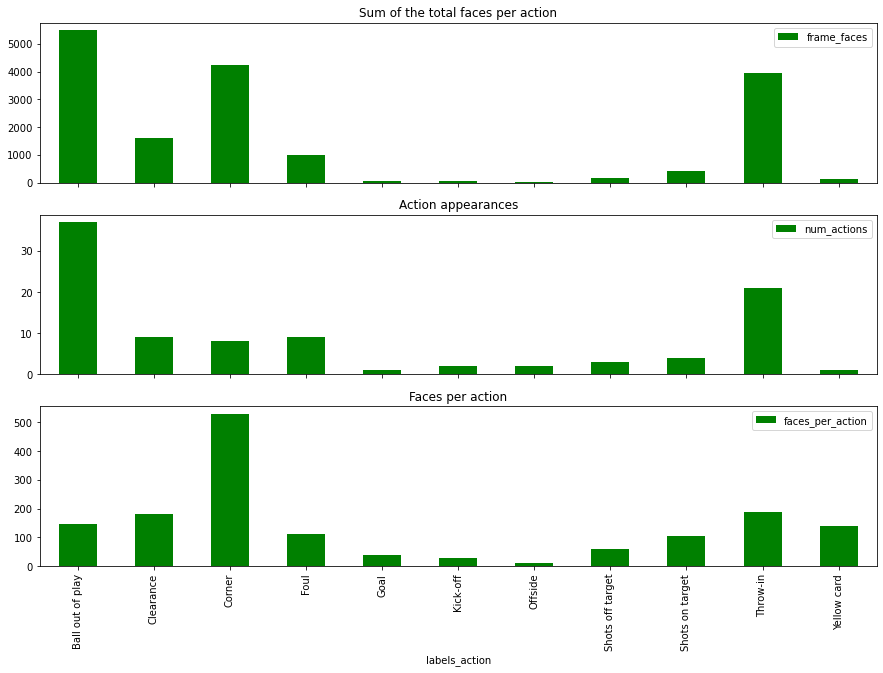

In [8]:
# Reation between total faces by action and times that the action apears
df3 = data.copy()
df3['frame_faces'] = df3['face_locations'].str.len()
df3 = df3[['action_name','frame_faces']]
count3 = df3.groupby(['action_name'], as_index=False).sum()

import json
json_path = '../data/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Labels-v2.json'
with open(json_path) as f:
    ann = json.load(f)
    
an_df = pd.DataFrame(ann['annotations'])
an_df = an_df.loc[an_df['gameTime'].str[:1]=='1']
an_df = an_df[['label']]
an_df['num']=1
count4 = an_df.groupby(['label'], as_index=False).sum().rename(columns={'label':'labels_action','num':'num_actions'})

a = pd.merge(count3,count4,left_on='action_name',right_on='labels_action',how='inner')
a['faces_per_action'] = a['frame_faces']/a['num_actions']

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True)

a.plot(kind='bar',x='action_name',y='frame_faces',color='green', figsize=(15,15),
       title='Sum of the total faces per action', ax=axes[0])

a.plot(kind='bar',x='labels_action',y='num_actions',color='green', figsize=(15,15),
       title='Action appearances', ax=axes[1])

a.plot(kind='bar',x='labels_action',y='faces_per_action',color='green', figsize=(15,10),
       title='Faces per action',ax=axes[2])

plt.show()

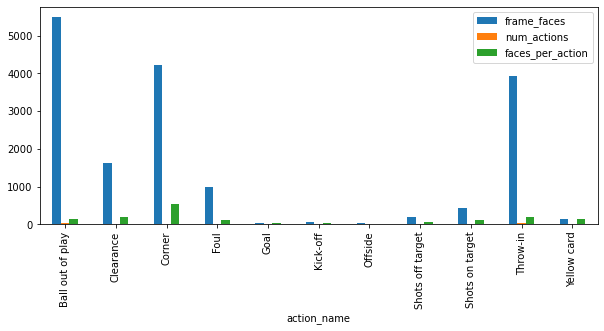

In [17]:
a.plot(kind='bar', x='action_name',figsize=(10,4))
plt.show()

# Plots and information related to WHEN the faces are detected

In [30]:
os.listdir('../data/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/1_HQ/frames8fps')

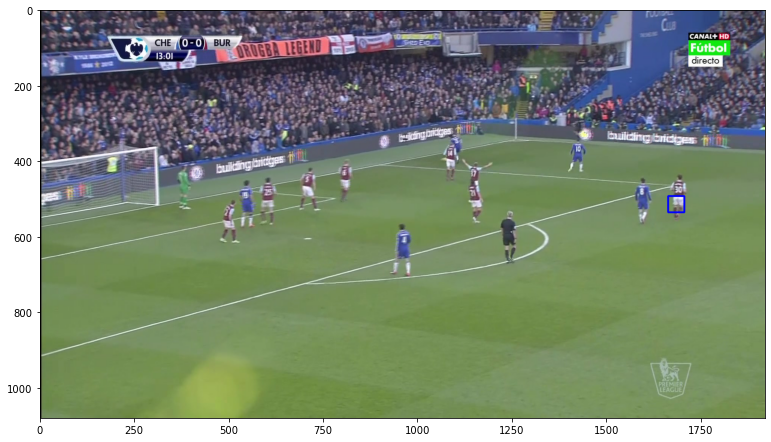

,face_locations,current_frame,action_frame,action_position,action_name,action_time,half
866,"[[486, 1717, 522, 1681]]",6251,6320,790722,Goal,1 - 13:10,1
867,"[[492, 1706, 535, 1663]]",6252,6320,790722,Goal,1 - 13:10,1
868,"[[482, 1639, 526, 1596]]",6257,6320,790722,Goal,1 - 13:10,1
869,"[[540, 919, 583, 876]]",6265,6320,790722,Goal,1 - 13:10,1
870,"[[410, 362, 454, 319]]",6278,6320,790722,Goal,1 - 13:10,1
871,"[[358, 941, 394, 905]]",6308,6320,790722,Goal,1 - 13:10,1
872,"[[382, 957, 418, 921]]",6314,6320,790722,Goal,1 - 13:10,1
873,"[[158, 73, 194, 37]]",6338,6320,790722,Goal,1 - 13:10,1
874,"[[36, 1356, 222, 1171]]",6345,6320,790722,Goal,1 - 13:10,1
875,"[[77, 1356, 263, 1171]]",6346,6320,790722,Goal,1 - 13:10,1


In [4]:
from skimage import io
import cv2

g = data.loc[data['action_name'] == 'Goal']
face_locations = g.loc[g['current_frame'] == 6252]['face_locations']
image = io.imread('../data/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/1_HQ/frames8fps/06252.jpg')

if len(face_locations)>0:
    for face in face_locations.array[0]:
        cv2.rectangle(image, (face[3], face[0]), (face[1],face[2]), (0,0,255), 3)
        fig = plt.figure(figsize=(15,7.5)) 
        plt.imshow(image)
        plt.show() 
        
g

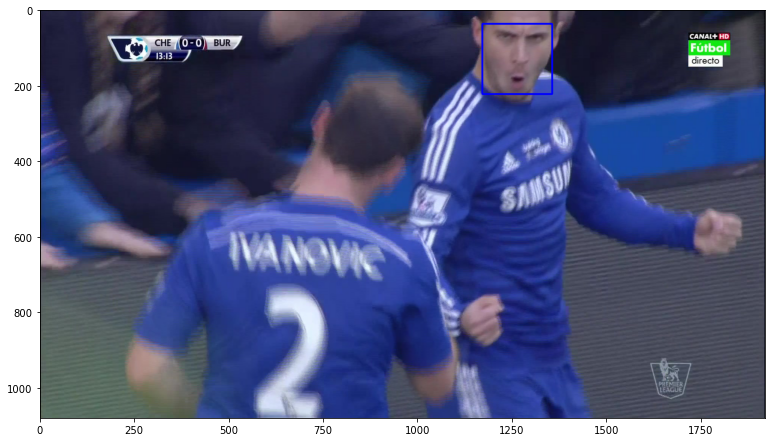

In [16]:
g = data.loc[data['action_name'] == 'Goal']
face_locations = g.loc[g['current_frame'] == 6345]['face_locations']
image = io.imread('../data/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/1_HQ/frames8fps/06345.jpg')

if len(face_locations)>0:
    for face in face_locations.array[0]:
        cv2.rectangle(image, (face[3], face[0]), (face[1],face[2]), (0,0,255), 3)
        fig = plt.figure(figsize=(15,7.5)) 
        plt.imshow(image)
        plt.show() 

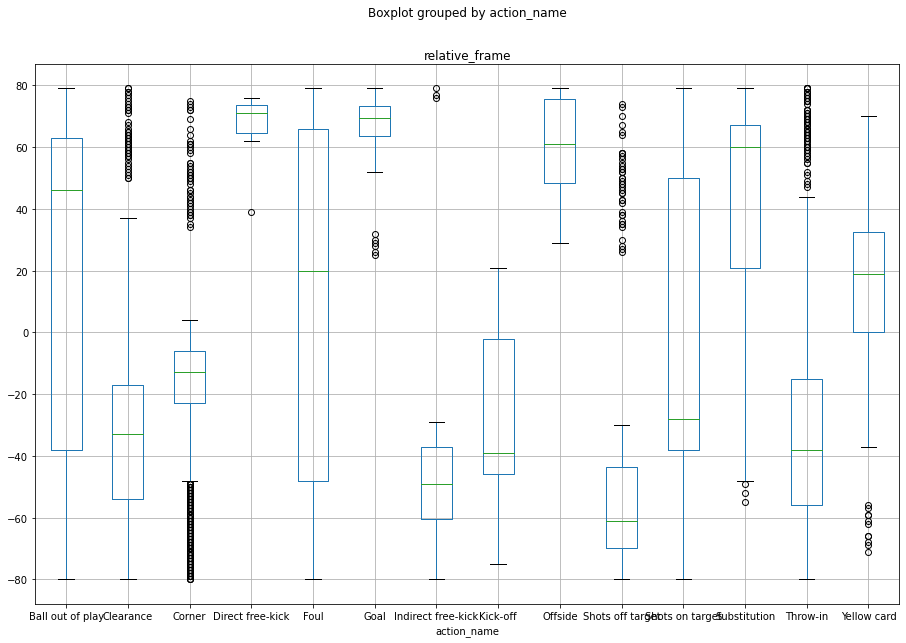

,action_name,action_time,action_position,relative_frame
0,Ball out of play,1 - 02:13,133295,37
1,Ball out of play,1 - 02:13,133295,40
2,Ball out of play,1 - 02:13,133295,48
3,Ball out of play,1 - 02:13,133295,50
4,Ball out of play,1 - 02:13,133295,52
...,...,...,...,...
17705,Throw-in,2 - 24:00,1440707,69
17706,Throw-in,2 - 24:00,1440707,70
17707,Throw-in,2 - 24:00,1440707,71
17708,Throw-in,2 - 24:00,1440707,72


In [9]:
dfw = data.copy()
dfw['frame_faces'] = dfw['face_locations'].str.len()
dfw['relative_frame'] = dfw['current_frame'] - dfw['action_frame']


dfw = dfw.loc[dfw.index.repeat(dfw.frame_faces)].reset_index(drop=True)
dfw = dfw[['action_name','action_time','action_position','relative_frame']]
dfw.boxplot(column='relative_frame',by='action_name', figsize=(15,10))
plt.show()
dfw


In [10]:
a = dfw.loc[dfw['action_name'] == 'Goal']
a

,action_name,action_time,action_position,relative_frame
5862,Goal,1 - 13:10,790722,25
5863,Goal,1 - 13:10,790722,26
5864,Goal,1 - 13:10,790722,28
5865,Goal,1 - 13:10,790722,29
5866,Goal,1 - 13:10,790722,30
5867,Goal,1 - 13:10,790722,32
5868,Goal,1 - 13:10,790722,52
5869,Goal,1 - 13:10,790722,55
5870,Goal,1 - 13:10,790722,63
5871,Goal,1 - 13:10,790722,63
